## Fake news analysis and prediction
Understanding the impact of fake news is crucial. This project, focuses on the analysis and prediction of fake news using advanced natural language processing techniques and machine learning algorithms.

In [110]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [111]:
# Read and explore the dataset
fake_news= pd.read_csv("news.csv")
fake_news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


## Data Preprocessing

In [112]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [113]:
fake_news.shape

(6335, 4)

In [114]:
fake_news["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [115]:
labels= fake_news.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [116]:
fake_news.tail

<bound method NDFrame.tail of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello.

## Model Development

In [117]:
# Split the table into train and test samples
x_train, x_test, y_train, y_test= train_test_split(fake_news["text"], labels, test_size= 0.4, random_state= 7)

In [118]:
# After that, we’ll initialize TfidfVectorizer with English stop words because it is useful when dealing with texts
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

In [119]:
#Create a PassiveAggressiveClassifier to learn how to correctly classify the objects into the categories of the model
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

## Evaluation

In [120]:
# Create a confusion matrix to measure the performance of the classification model
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1188,   82],
       [  88, 1176]], dtype=int64)

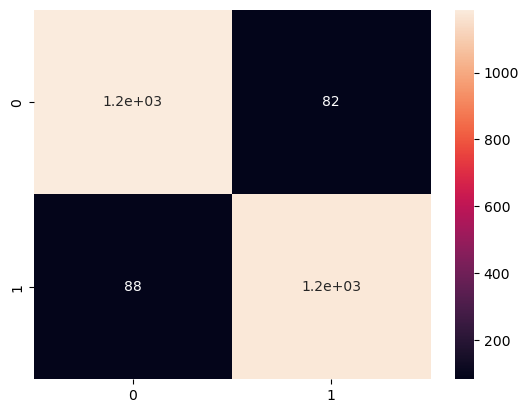

In [121]:
#Visualize the confusion matrix
sns.heatmap(matrix,annot=True)
plt.show()

*This plot helps to visualize the number of true positives, true negatives, false positives, and false negatives for the above model.*

In [122]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.29123914759275

- **The model achieves an accuracy of 93%.**


In [123]:
Result= classification_report(y_test, y_pred)
print(Result)

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [125]:
np.mean

<function mean at 0x00000173C9CA3670>

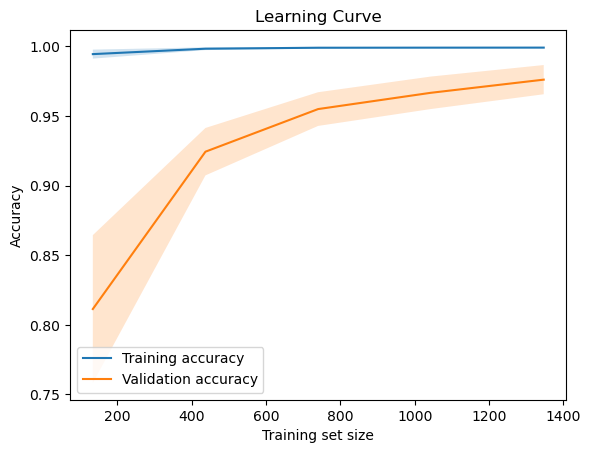

In [148]:
from sklearn.model_selection import learning_curve

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=4, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

*The above learning Curve shows how quickly our model can be performed over time.*